In [1]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

In [2]:
def plot_dendrogram(model, **kwargs):

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)

In [3]:
E = np.array([[7.1,1.5],[5,14.6],[9.7,8.1],[14,4.6],[15.5,2.2],[18.4,6.2],[20.3,10.3]])

clustering = AgglomerativeClustering(n_clusters=2, linkage="single").fit(E)
print(clustering.labels_)

[0 1 0 0 0 0 0]


[2 1 0 0 0 0 0]


AttributeError: 'AgglomerativeClustering' object has no attribute 'distances_'

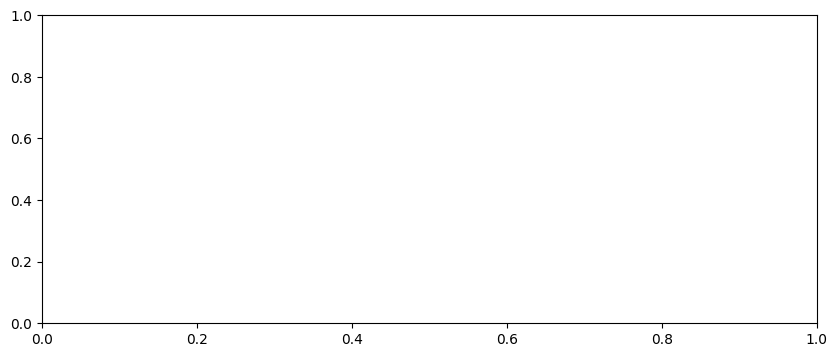

In [4]:
clustering = AgglomerativeClustering(n_clusters=3, linkage="single").fit(E)
print(clustering.labels_)

fig = plt.figure(figsize=(10,4))
plot_dendrogram(clustering, truncate_mode="level", p=4, ax=fig.gca(), labels=E)
plt.xlabel('Datenpunkte', fontsize=14)
plt.ylabel('Distanz', fontsize=14)
plt.show()